In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
import keras
import pandas as pd
from keras.layers import Dense, Activation, LSTM, Input

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(LSTM(30, input_shape = (None, 3), return_sequences = True))
#model.add(LSTM(30))
model.add(Dense(40))
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])


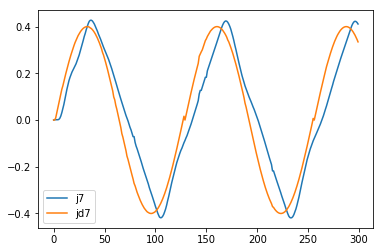

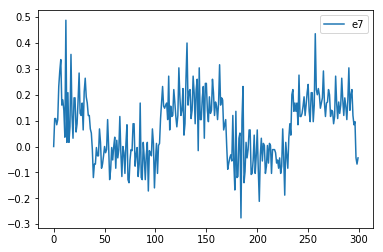

In [4]:
df = pd.read_csv('../vel_sin_motion_incrf/test_joint7/training_data_5.csv')
df_eval = pd.read_csv('../vel_sin_motion_incrf/test_joint7/validation_data_5.csv')
#df_val = pd.read_csv('validation_data.csv')
fig1 = plt.figure()
df.j7[0:300].plot()
df.jd7[0:300].plot(); plt.legend(loc='best')
fig2 = plt.figure(); df.e7[0:300].plot(); plt.legend(loc='best')

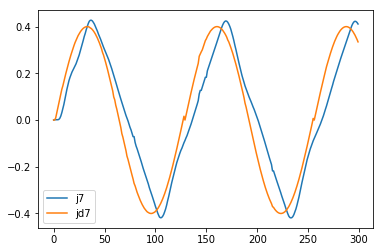

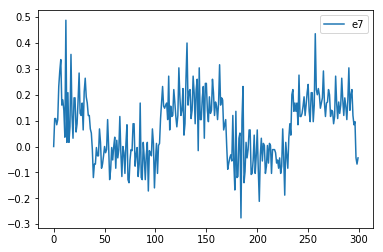

In [5]:
sample_training1 = np.array(df.j7.values.tolist())
sample_training1 = sample_training1[1:]
sample_training1 = sample_training1.reshape(1,3500,1)
sample_training2 = np.array(df.e7.values.tolist())
sample_training2 = sample_training2[1:]
sample_training2 = sample_training2.reshape(1,3500,1)
sample_training3 = np.array(df.v7.values.tolist())
sample_training3 = sample_training3[1:]
sample_training3 = sample_training3.reshape(1,3500,1)
x_train = np.concatenate([sample_training1, sample_training2, sample_training3], axis= 2)
y_train = np.array(df.jd7.values.tolist())[1:].reshape(1,3500,1)

print x_train.shape
print y_train.shape


(1, 3500, 3)
(1, 3500, 1)


In [8]:
model.fit(x_train, y_train, epochs =20)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.3269 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 0.3066 - acc: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 0.2872 - acc: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.2685 - acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 0.2506 - acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 0.2332 - acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 0.2164 - acc: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 3s 3s/step - loss: 0.2004 - acc: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 3s 3s/step - loss: 0.1846 - acc: 0.0000e+00
Epoch 10/20
1/1 [==============================] - 3s 3s/step - loss: 0.1692 - acc: 0.0000e+00
Epoch 11/20
1/1 [==============================] - 3s 3s/st

In [10]:
sample_training11 = np.array(df_eval.j7.values.tolist())
sample_training11= sample_training11[1:]
sample_training11 = sample_training11.reshape(1,1500,1)
sample_training21 = np.array(df_eval.e7.values.tolist())
sample_training21 = sample_training21[1:]
sample_training21 = sample_training21.reshape(1,1500,1)
sample_training31 = np.array(df_eval.v7.values.tolist())
sample_training31 = sample_training31[1:]
sample_training31 = sample_training31.reshape(1,1500,1)
x_val = np.concatenate([sample_training11, sample_training21, sample_training31], axis= 2)


<Figure size 432x288 with 0 Axes>

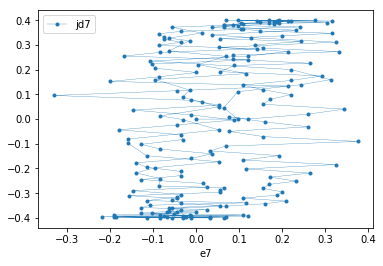

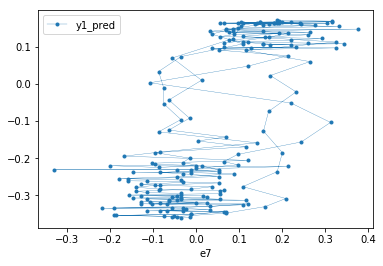

In [11]:
pred = model.predict(x_val)
pred = pred.reshape(1500,1)
ze = np.zeros([1,1])
pred = np.concatenate((pred, ze), axis = 0)
pred = np.array(pred)
pred.shape

df_eval['y1_pred'] = pred

fig5 = plt.figure(); df_eval[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.3)
df_eval[0:200].plot(x = 'e7', y = 'y1_pred', marker='.',lw=0.3); plt.legend(loc='best')

In [29]:

#df_eval['e7'].shape

(1501, 1)

<Figure size 432x288 with 0 Axes>

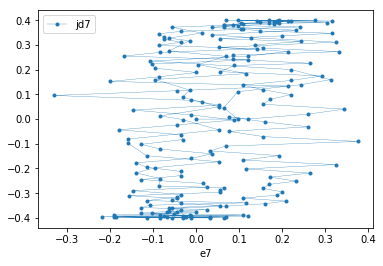

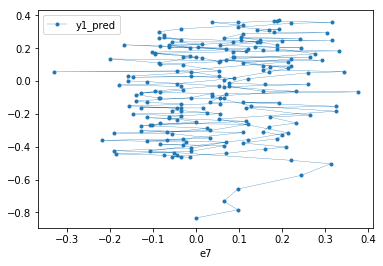

In [12]:
from keras.layers import SimpleRNN

In [35]:
model1 = Sequential()
model1.add(SimpleRNN(30, activation=LeakyReLU(alpha=0.3), input_shape = (None, 3), return_sequences = True))
model1.add(Dense(40))
model1.add(Dense(units=20, activation='sigmoid'))
model1.add(Dense(units=1, activation='linear'))

model1.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/keras/activations.py:197: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [36]:
model1.fit(x_train, y_train, epochs = 500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.7282 - acc: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 1s 1s/step - loss: 0.6517 - acc: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 1s 1s/step - loss: 0.5789 - acc: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 0.5096 - acc: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 2s 2s/step - loss: 0.4440 - acc: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 1s 1s/step - loss: 0.3820 - acc: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 1s 1s/step - loss: 0.3239 - acc: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 2s 2s/step - loss: 0.2701 - acc: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 2s 2s/step - loss: 0.2216 - acc: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 1s 1s/step - loss: 0.1796 - acc: 0.0000e+00
Epoch 11/500
1/1 [==============================]

Epoch 87/500
1/1 [==============================] - 1s 1s/step - loss: 0.0069 - acc: 0.0000e+00
Epoch 88/500
1/1 [==============================] - 1s 1s/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 89/500
1/1 [==============================] - 1s 1s/step - loss: 0.0057 - acc: 0.0000e+00
Epoch 90/500
1/1 [==============================] - 1s 1s/step - loss: 0.0055 - acc: 0.0000e+00
Epoch 91/500
1/1 [==============================] - 1s 1s/step - loss: 0.0054 - acc: 0.0000e+00
Epoch 92/500
1/1 [==============================] - 1s 1s/step - loss: 0.0055 - acc: 0.0000e+00
Epoch 93/500
1/1 [==============================] - 1s 1s/step - loss: 0.0055 - acc: 0.0000e+00
Epoch 94/500
1/1 [==============================] - 1s 1s/step - loss: 0.0052 - acc: 0.0000e+00
Epoch 95/500
1/1 [==============================] - 1s 1s/step - loss: 0.0051 - acc: 0.0000e+00
Epoch 96/500
1/1 [==============================] - 1s 1s/step - loss: 0.0048 - acc: 0.0000e+00
Epoch 97/500
1/1 [======================

Epoch 172/500
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - acc: 0.0000e+00
Epoch 173/500
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - acc: 0.0000e+00
Epoch 174/500
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - acc: 0.0000e+00
Epoch 175/500
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - acc: 0.0000e+00
Epoch 176/500
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - acc: 0.0000e+00
Epoch 177/500
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - acc: 0.0000e+00
Epoch 178/500
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - acc: 0.0000e+00
Epoch 179/500
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - acc: 0.0000e+00
Epoch 180/500
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - acc: 0.0000e+00
Epoch 181/500
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - acc: 0.0000e+00
Epoch 182/500
1/1 [===========

Epoch 257/500
1/1 [==============================] - 1s 1s/step - loss: 0.0018 - acc: 0.0000e+00
Epoch 258/500
1/1 [==============================] - 1s 1s/step - loss: 0.0018 - acc: 0.0000e+00
Epoch 259/500
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - acc: 0.0000e+00
Epoch 260/500
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - acc: 0.0000e+00
Epoch 261/500
1/1 [==============================] - 2s 2s/step - loss: 0.0017 - acc: 0.0000e+00
Epoch 262/500
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - acc: 0.0000e+00
Epoch 263/500
1/1 [==============================] - 2s 2s/step - loss: 0.0017 - acc: 0.0000e+00
Epoch 264/500
1/1 [==============================] - 2s 2s/step - loss: 0.0017 - acc: 0.0000e+00
Epoch 265/500
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - acc: 0.0000e+00
Epoch 266/500
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - acc: 0.0000e+00
Epoch 267/500
1/1 [===========

Epoch 342/500
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 343/500
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 344/500
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 345/500
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 346/500
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 347/500
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 348/500
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 349/500
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 350/500
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 351/500
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - acc: 0.0000e+00
Epoch 352/500
1/1 [===========

Epoch 427/500
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - acc: 0.0000e+00
Epoch 428/500
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - acc: 0.0000e+00
Epoch 429/500
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - acc: 0.0000e+00
Epoch 430/500
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - acc: 0.0000e+00
Epoch 431/500
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - acc: 0.0000e+00
Epoch 432/500
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - acc: 0.0000e+00
Epoch 433/500
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - acc: 0.0000e+00
Epoch 434/500
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - acc: 0.0000e+00
Epoch 435/500
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - acc: 0.0000e+00
Epoch 436/500
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - acc: 0.0000e+00
Epoch 437/500
1/1 [===========

<Figure size 432x288 with 0 Axes>

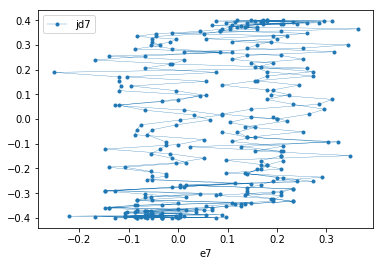

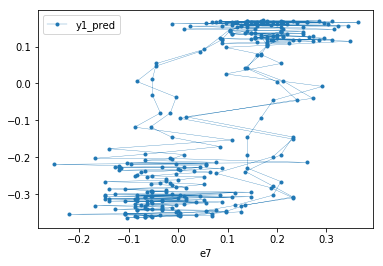

In [31]:
pred2 = model.predict(x_val)
pred2 = pred2.reshape(1500,1)
ze = np.zeros([1,1])
pred2 = np.concatenate((pred2, ze), axis = 0)
pred2 = np.array(pred2)
pred2.shape


df_eval['y1_pred'] = pred2

fig5 = plt.figure(); df_eval[1000:1300].plot(x = 'e7', y = 'jd7', marker='.',lw=0.3)
df_eval[1000:1300].plot(x = 'e7', y = 'y1_pred', marker='.',lw=0.3); plt.legend(loc='best')

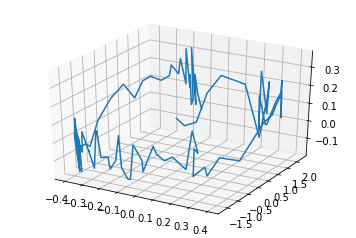

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_eval['jd7'][1:100],df_eval['v7'][1:100], zs = df_eval['e7'][1:100])

In [33]:
from keras.layers import LeakyReLU